In [1]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import MinMaxScaler 
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.preprocessing import StandardScaler 
from sklearn.model_selection import train_test_split
from sklearn.cross_validation import train_test_split

import glob
import pandas as pd
import numpy as np
from keras.utils import to_categorical
import matplotlib.pyplot as plt




import warnings
warnings.simplefilter('ignore')

# %matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

C:\Users\m_cha\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
C:\Users\m_cha\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
# Read the csv file into a pandas DataFrame

filelist = glob.glob('Resources/*.csv')
filelist


['Resources\\expedition_everest.csv',
 'Resources\\rock_n_rollercoaster.csv',
 'Resources\\soarin.csv',
 'Resources\\splash_mountain.csv']

In [3]:
data = {}

for filename in filelist:
    data[filename[10:-4]] = pd.read_csv(filename)
    
data    

{'expedition_everest':         SACTMIN  DAYOFWEEK  DAYOFYEAR  MONTHOFYEAR    YEAR  \
 0     10.500000        5.0        0.0          1.0  2015.0   
 1      5.500000        6.0        1.0          1.0  2015.0   
 2     24.333333        7.0        2.0          1.0  2015.0   
 3     25.000000        1.0        3.0          1.0  2015.0   
 4      3.000000        2.0        4.0          1.0  2015.0   
 5     10.333333        3.0        5.0          1.0  2015.0   
 6      9.000000        4.0        6.0          1.0  2015.0   
 7     35.000000        5.0        7.0          1.0  2015.0   
 8      7.666667        6.0        8.0          1.0  2015.0   
 9     27.500000        7.0        9.0          1.0  2015.0   
 10     9.500000        1.0       10.0          1.0  2015.0   
 11     0.000000        2.0       11.0          1.0  2015.0   
 12     3.000000        3.0       12.0          1.0  2015.0   
 13    11.500000        5.0       14.0          1.0  2015.0   
 14    22.250000        6.0      

In [4]:
seasons = []
for season in list(data["splash_mountain"]["SEASON"].values):
    if season not in seasons:
        seasons.append(season)
seasons

['CHRISTMAS PEAK',
 'CHRISTMAS',
 'WINTER',
 'PRESIDENTS WEEK',
 'SPRING',
 'EASTER',
 'MEMORIAL DAY',
 'SUMMER BREAK',
 'JULY 4TH',
 'SEPTEMBER LOW',
 'FALL',
 'COLUMBUS DAY',
 'HALLOWEEN',
 'JERSEY WEEK',
 'THANKSGIVING',
 'MARTIN LUTHER KING JUNIOR DAY',
 'MARDI GRAS']

In [5]:
len(data["splash_mountain"].columns)
len(data["soarin"].columns)

139

In [6]:
data["soarin"]["SACTMIN"].values

array([61.        , 24.33333333, 18.        , ..., 31.33333333,
       24.        , 25.2       ])

In [7]:
data["soarin"].loc[:, data["soarin"].columns != 'SACTMIN'].values

array([[5.0, 0.0, 1.0, ..., 0.0, 3.0, 0.0],
       [6.0, 1.0, 1.0, ..., 0.0, 3.0, 0.0],
       [3.0, 5.0, 1.0, ..., 0.0, 1.0, 0.0],
       ...,
       [1.0, 209.0, 7.0, ..., 1.0, 2.0, 2.0],
       [2.0, 210.0, 7.0, ..., 1.0, 2.0, 2.0],
       [3.0, 211.0, 7.0, ..., 1.0, 2.0, 2.0]], dtype=object)

In [8]:
def convertTimetoInt(time):
    time = time.replace(':', '')
    return((int(time[0]) + float(time[1])/60))
for x in data: 
    for i in data[x].columns[data[x].dtypes == object]:
        if ':' in data[x][i][0]:
            data[x][i] = data[x][i].map(convertTimetoInt)
        elif '%' in data[x][i][0]:
            data[x][i] = data[x][i].map(lambda x: x.strip('%'))
        elif 'SEASON' in i:
            #temp[i] = to_categorical(pd.factorize(temp[i])[0])
            data[x][i] = pd.factorize(data[x][i])[0]
        elif ' ' in data[x][i][0]:
            data[x][i] = pd.factorize(data[x][i])[0]

In [9]:
data[x]

,SACTMIN,DAYOFWEEK,DAYOFYEAR,MONTHOFYEAR,YEAR,SEASON,HOLIDAYPX,HOLIDAYM,HOLIDAY,WDWevent,...,HS20CAPACITY,MKPRDDAY,MKPRDDT1,MKPRDDN,MKPRDNGT,MKFIREWK,EPFIREWK,HSFIREWK,HSSHWNGT,AKSHWNGT
0,11.500000,5.0,0.0,1.0,2015.0,0,0.0,5.0,1.0,0.0,...,1000.0,2.0,1.033333,0,1.0,1.0,1.0,0.0,3.0,0.0
1,1.000000,6.0,1.0,1.0,2015.0,1,2.0,5.0,0.0,0.0,...,1000.0,2.0,1.033333,0,1.0,1.0,1.0,0.0,3.0,0.0
2,37.333333,7.0,2.0,1.0,2015.0,1,3.0,0.0,0.0,0.0,...,1000.0,2.0,1.033333,0,1.0,1.0,1.0,0.0,2.0,0.0
3,16.000000,1.0,3.0,1.0,2015.0,1,4.0,0.0,0.0,0.0,...,1000.0,1.0,1.083333,0,2.0,1.0,1.0,0.0,2.0,0.0
4,11.400000,1.0,31.0,2.0,2015.0,2,0.0,0.0,1.0,0.0,...,1000.0,1.0,1.083333,0,2.0,1.0,1.0,0.0,1.0,0.0
5,2.500000,3.0,33.0,2.0,2015.0,2,3.0,0.0,0.0,0.0,...,1000.0,1.0,1.083333,0,1.0,1.0,1.0,0.0,1.0,0.0
6,5.000000,4.0,34.0,2.0,2015.0,2,4.0,0.0,0.0,0.0,...,1000.0,1.0,1.083333,0,1.0,1.0,1.0,0.0,1.0,0.0
7,3.000000,5.0,35.0,2.0,2015.0,2,5.0,0.0,0.0,0.0,...,1000.0,1.0,1.083333,0,1.0,1.0,1.0,0.0,1.0,0.0
8,14.000000,6.0,36.0,2.0,2015.0,2,6.0,0.0,0.0,0.0,...,1000.0,1.0,1.083333,0,2.0,1.0,1.0,0.0,1.0,0.0
9,31.000000,7.0,37.0,2.0,2015.0,2,7.0,0.0,0.0,0.0,...,1000.0,1.0,1.083333,0,2.0,1.0,1.0,0.0,2.0,0.0


In [10]:
for x in data:
    target = data[x]["SACTMIN"].values
    target = target.round()
    real_data = data[x].loc[:, data[x].columns != 'SACTMIN'].values
    
    rf = RandomForestClassifier(n_estimators=200)
    rf = rf.fit(real_data, target)
    print(x)
    print(rf.score(real_data, target))

    importances = rf.feature_importances_

expedition_everest
1.0
rock_n_rollercoaster
1.0
soarin
1.0
splash_mountain
1.0


In [11]:
variables = {}

for x in data:
    print(x)
    variables[x] = pd.DataFrame(sorted(zip(rf.feature_importances_, list(data[x].columns)), reverse=True))

expedition_everest
rock_n_rollercoaster
soarin
splash_mountain


In [12]:
variables["expedition_everest"].head(60)

,0,1
0,0.029110,WDWrace
1,0.028069,WDWMAXTEMP
2,0.026423,WDWMINTEMP
3,0.024259,PARTYSEASON_WDW
4,0.022646,SEASON
5,0.022434,DAYOFWEEK
6,0.021030,WEATHER_WDWHIGH
7,0.020464,WDWMINTEMP_mean
8,0.016864,AKevent
9,0.016427,WEATHER_WDWLOW


In [13]:
variables["rock_n_rollercoaster"].head(60)

,0,1
0,0.029110,WDWrace
1,0.028069,WDWMAXTEMP
2,0.026423,WDWMINTEMP
3,0.024259,PARTYSEASON_WDW
4,0.022646,SEASON
5,0.022434,DAYOFWEEK
6,0.021030,WEATHER_WDWHIGH
7,0.020464,WDWMINTEMP_mean
8,0.016864,AKevent
9,0.016427,WEATHER_WDWLOW


In [14]:
variables["soarin"].head(60)

,0,1
0,0.029110,WDWrace
1,0.028069,WDWMAXTEMP
2,0.026423,WDWMINTEMP
3,0.024259,PARTYSEASON_WDW
4,0.022646,SEASON
5,0.022434,DAYOFWEEK
6,0.021030,WEATHER_WDWHIGH
7,0.020464,WDWMINTEMP_mean
8,0.016864,AKevent
9,0.016427,WEATHER_WDWLOW


In [15]:
variables["splash_mountain"].head(60)

,0,1
0,0.029110,WDWrace
1,0.028069,WDWMAXTEMP
2,0.026423,WDWMINTEMP
3,0.024259,PARTYSEASON_WDW
4,0.022646,SEASON
5,0.022434,DAYOFWEEK
6,0.021030,WEATHER_WDWHIGH
7,0.020464,WDWMINTEMP_mean
8,0.016864,AKevent
9,0.016427,WEATHER_WDWLOW


In [16]:
modelingData = {}
for x in data:
    modelingData[x] = data[x][['SACTMIN','WDWMAXTEMP', 'PARTYSEASON_WDW', 'inSession', 'SEASON', 'DAYOFWEEK']]

In [19]:
temp = modelingData["soarin"]
temp = temp.round({'SACTMIN':2})
temp.head()

,SACTMIN,WDWMAXTEMP,PARTYSEASON_WDW,inSession,SEASON,DAYOFWEEK
0,61.00,73.02,0,0,0,5.0
1,24.33,78.00,0,0,1,6.0
2,18.00,77.67,0,86,1,3.0
3,65.00,59.44,0,88,1,5.0
4,30.50,54.89,0,88,1,6.0


In [20]:
target = temp["SACTMIN"].values
data = temp.loc[:, temp.columns != 'SACTMIN'].values.tolist()

In [21]:
temp.to_csv('testdata_S.csv', index = False)

In [22]:
dataset = pd.read_csv('testdata_S.csv')
print(dataset.head(5))


   SACTMIN  WDWMAXTEMP  PARTYSEASON_WDW  inSession  SEASON  DAYOFWEEK
0    61.00       73.02                0          0       0        5.0
1    24.33       78.00                0          0       1        6.0
2    18.00       77.67                0         86       1        3.0
3    65.00       59.44                0         88       1        5.0
4    30.50       54.89                0         88       1        6.0


In [23]:
##Seasons Dict
# 0 = Christmas Peak
# 1 = Christmas
# 2 = Winter
# 3 = MLK Day
# 4 = Presidents Week
# 5 = Spring
# 6 = Easter
# 7 = Memorial Day
# 8 = July 4th
# 9 = Summer Break
#10 = September Low
#11 = Fall
#12 = Columbus Day
#13 = Halloween
#14 = Jersey Week
#15 = Thanksgiving
#16 = Mardi Gras

df1 = pd.get_dummies(temp['SEASON'])
df1.columns = ['Christmas Peak','Christmas','Winter','MLK day','Presidents Week','Spring', 'Easter','Memorial Day','Independence Day','Summer Break','September Low','Fall','Columbus Day','Halloween','Jersey Week','Thanksgiving','Mardi Gras']
print(df1)

      Christmas Peak  Christmas  Winter  MLK day  Presidents Week  Spring  \
0                  1          0       0        0                0       0   
1                  0          1       0        0                0       0   
2                  0          1       0        0                0       0   
3                  0          1       0        0                0       0   
4                  0          1       0        0                0       0   
5                  0          0       1        0                0       0   
6                  0          0       1        0                0       0   
7                  0          0       1        0                0       0   
8                  0          0       1        0                0       0   
9                  0          0       0        1                0       0   
10                 0          0       0        1                0       0   
11                 0          0       0        1                0       0   

In [24]:
df2 = pd.get_dummies(temp['DAYOFWEEK'])
df2.columns = ['Sunday','Monday','Tuesday','Wednesday','Thursday','Friday', 'Saturday']
print(df2)

      Sunday  Monday  Tuesday  Wednesday  Thursday  Friday  Saturday
0          0       0        0          0         1       0         0
1          0       0        0          0         0       1         0
2          0       0        1          0         0       0         0
3          0       0        0          0         1       0         0
4          0       0        0          0         0       1         0
5          0       0        0          0         0       0         1
6          0       1        0          0         0       0         0
7          0       0        1          0         0       0         0
8          0       0        0          1         0       0         0
9          0       0        0          0         1       0         0
10         0       0        0          0         0       1         0
11         1       0        0          0         0       0         0
12         0       1        0          0         0       0         0
13         0       0        0     

In [25]:
final = temp.drop(['SEASON','DAYOFWEEK'], axis=1 )
final.tail()

,SACTMIN,WDWMAXTEMP,PARTYSEASON_WDW,inSession
1006,21.50,90.21,0,16
1007,7.00,91.31,0,16
1008,31.33,90.08,0,21
1009,24.00,85.95,0,21
1010,25.20,88.40,0,22


In [26]:
final.tail()

,SACTMIN,WDWMAXTEMP,PARTYSEASON_WDW,inSession
1006,21.50,90.21,0,16
1007,7.00,91.31,0,16
1008,31.33,90.08,0,21
1009,24.00,85.95,0,21
1010,25.20,88.40,0,22


In [27]:
first_final = final.join(df1)
first_final.tail()

,SACTMIN,WDWMAXTEMP,PARTYSEASON_WDW,inSession,Christmas Peak,Christmas,Winter,MLK day,Presidents Week,Spring,...,Memorial Day,Independence Day,Summer Break,September Low,Fall,Columbus Day,Halloween,Jersey Week,Thanksgiving,Mardi Gras
1006,21.50,90.21,0,16,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
1007,7.00,91.31,0,16,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
1008,31.33,90.08,0,21,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
1009,24.00,85.95,0,21,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
1010,25.20,88.40,0,22,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0


In [28]:
final_df = first_final.join(df2)
final_df.tail()

,SACTMIN,WDWMAXTEMP,PARTYSEASON_WDW,inSession,Christmas Peak,Christmas,Winter,MLK day,Presidents Week,Spring,...,Jersey Week,Thanksgiving,Mardi Gras,Sunday,Monday,Tuesday,Wednesday,Thursday,Friday,Saturday
1006,21.50,90.21,0,16,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1007,7.00,91.31,0,16,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1008,31.33,90.08,0,21,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
1009,24.00,85.95,0,21,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
1010,25.20,88.40,0,22,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0


In [29]:
final_df.columns

Index(['SACTMIN', 'WDWMAXTEMP', 'PARTYSEASON_WDW', 'inSession',
       'Christmas Peak', 'Christmas', 'Winter', 'MLK day', 'Presidents Week',
       'Spring', 'Easter', 'Memorial Day', 'Independence Day', 'Summer Break',
       'September Low', 'Fall', 'Columbus Day', 'Halloween', 'Jersey Week',
       'Thanksgiving', 'Mardi Gras', 'Sunday', 'Monday', 'Tuesday',
       'Wednesday', 'Thursday', 'Friday', 'Saturday'],
      dtype='object')

In [30]:
final_df.to_csv('finaldata.csv', index = False)

In [124]:
# Assign X (data) and y (target)

dataset = pd.read_csv('finaldata.csv')
X = dataset.iloc[:,1:29].values
y =dataset.iloc[:,0].values.reshape(-1,1)

In [125]:
from sklearn.cross_validation import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(X, y, test_size = 0.25)

In [126]:
# Create a StandardScater model and fit it to the training data

from sklearn.preprocessing import StandardScaler
sc_x=StandardScaler()
sc_y=StandardScaler()
x =sc_x.fit_transform(X)
#y =sc_y.fit_transform(y)

In [127]:
# Transform the training and testing data using the X_scaler and y_scaler models

from sklearn.svm import SVR
model = SVR(kernel = 'rbf')
model.fit(X,y)

SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='auto',
  kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [128]:
print('Test Acc: %.3f' % model.score(xtest, ytest))

Test Acc: 0.081


In [108]:
test = np.array([60,0,16,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0])
test = test.reshape(1,-1)
test =sc_x.fit_transform(test)

print(model.predict(test))

[28.18581553]


ValueError: x and y must be the same size

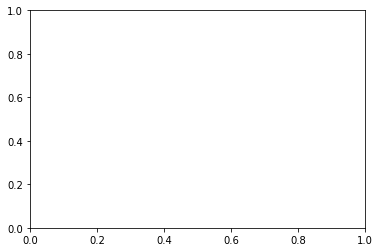

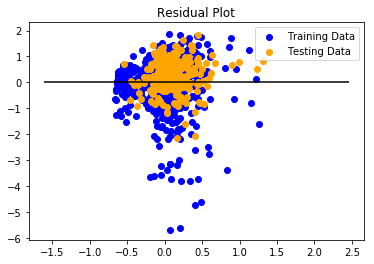

In [134]:
predictions = model.predict(X_test_scaled)
model.fit(X_train_scaled, y_train_scaled)
plt.scatter(model.predict(X_train_scaled), model.predict(X_train_scaled) - y_train_scaled, c="blue", label="Training Data")
plt.scatter(model.predict(X_test_scaled), model.predict(X_test_scaled) - y_test_scaled, c="orange", label="Testing Data")
plt.legend()
plt.hlines(y=0, xmin=y_test_scaled.min(), xmax=y_test_scaled.max())
plt.title("Residual Plot")
plt.show()

In [135]:
# Used X_test_scaled, y_test_scaled, and model.predict(X_test_scaled) to calculate MSE and R2

from sklearn.metrics import mean_squared_error

MSE = mean_squared_error(y_test_scaled, predictions)
r2 = model.score(X_test_scaled, y_test_scaled)


print(f"MSE: {MSE}, R2: {r2}")

MSE: 0.44939429652386054, R2: -0.06805171386959752


In [136]:
# LASSO model
# Note: Use an alpha of .01 when creating the model for this activity
from sklearn.linear_model import Lasso

lasso = Lasso(alpha=.01).fit(X_train_scaled, y_train_scaled)

predictions = lasso.predict(X_test_scaled)

MSE = mean_squared_error(y_test_scaled, predictions)
r2 = lasso.score(X_test_scaled, y_test_scaled)

print(f"MSE: {MSE}, R2: {r2}")

MSE: 0.43877620282298796, R2: -0.04281625079637429


In [137]:
# Ridge model
# Note: Use an alpha of .01 when creating the model for this activity
from sklearn.linear_model import Ridge

ridge = Ridge(alpha=.01).fit(X_train_scaled, y_train_scaled)

predictions = ridge.predict(X_test_scaled)

MSE = mean_squared_error(y_test_scaled, predictions)
r2 = ridge.score(X_test_scaled, y_test_scaled)


print(f"MSE: {MSE}, R2: {r2}")

MSE: 0.453011443077129, R2: -0.07664839523698252


In [138]:
# ElasticNet model

from sklearn.linear_model import ElasticNet

elasticnet = ElasticNet(alpha=.01).fit(X_train_scaled, y_train_scaled)

predictions = elasticnet.predict(X_test_scaled)

MSE = mean_squared_error(y_test_scaled, predictions)
r2 = elasticnet.score(X_test_scaled, y_test_scaled)


print(f"MSE: {MSE}, R2: {r2}")

MSE: 0.4446872246786395, R2: -0.05686466456682826
